In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import quandl

bitcoin_original = quandl.get("BCHAIN/MKPRU")


## Limpio los datos y afino los precios calculando el SMA de los ultimos 5 dias

In [2]:
bitcoin = bitcoin_original.copy()
bitcoin.columns = ['Close']
bitcoin['sma'] = bitcoin['Close'].rolling(window=5).mean()
bitcoin['Close'].replace(0, np.nan, inplace=True)
bitcoin = bitcoin.dropna()


## Ajusto la curva al SMA respecto al precio en escala logaritmica

[-1.30227939e+01  1.07865372e-03  4.99638178e-01  1.00031714e+00
  2.29791128e+00  6.21199189e+01]


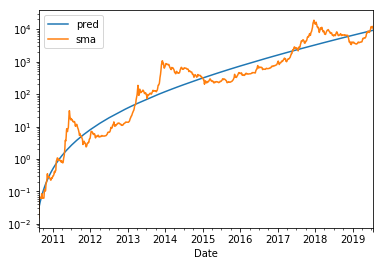

In [3]:
ydata = np.log(bitcoin.sma.values)
xdata = np.arange(0,len(bitcoin))

def func(x, d,e, f,g, a,b):
    return d +  e*x + (f-0.5) * np.sin(x*g) + np.log(x + b) * a

#plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)


bitcoin['pred'] = np.exp(func(xdata, *popt))
bitcoin[['pred', 'sma']].plot(logy=True)



## Con la curva trazada hago una prediccion del fururo

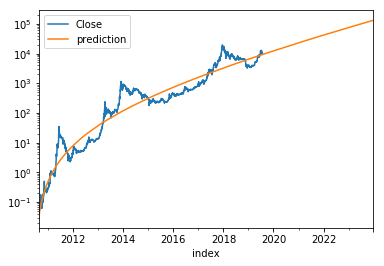

In [4]:
index_future = pd.date_range(start='2010-08-17', end='2023-12-30')
future = np.exp(func(np.arange(0,len(index_future)), *popt))

futurepd = pd.DataFrame.from_dict({"index": index_future, "prediction": future});
futurepd = futurepd.set_index('index')
futurepd.join(bitcoin)[['Close', 'prediction']].plot(logy=True)

## Mismo grafico pero sin escala logaritmica... llegamos al millon para 2027?!?!?

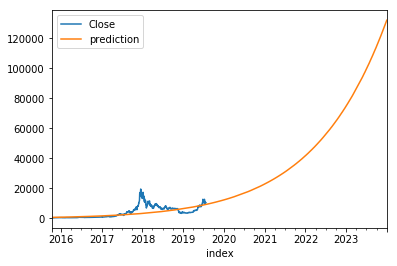

In [5]:
futurepd.join(bitcoin)[['Close', 'prediction']][-3000:].plot()

## Parece que si... salgan a comprar ya!

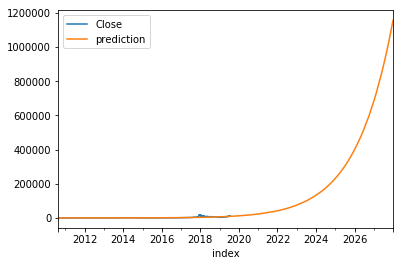

In [6]:
index_future = pd.date_range(start='2010-08-17', end='2027-12-30')
future = np.exp(func(np.arange(0,len(index_future)), *popt))

futurepd = pd.DataFrame.from_dict({"index": index_future, "prediction": future});
futurepd = futurepd.set_index('index')
futurepd.join(bitcoin)[['Close', 'prediction']].plot()